In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

20.98245402898833 168.52593181750223
-24.78664041126646 -131.5072927437187
87.6705329715671 138.08050487102878
58.45127009097763 13.502277258605034
-28.469364136729027 132.58170352216416
-24.660596980064668 -1.0139185189045747
25.156943771018632 -88.19431479314167
7.148689837479125 -140.05706361495987
87.52733368542357 84.14138891973295
9.106758075686372 172.99983292345007
-37.32120923731812 -62.259298992744405
-83.00446071030017 116.87358659468521
57.708470793411465 10.156815625154934
5.376775620654286 -128.65775338857182
-72.76191258416807 8.939647383107342
65.83084268261936 -56.92145636602197
-74.04797487359899 -82.44369284239136
43.07864973890773 -149.44660564165787
0.8183780169575243 -65.01796584820302
77.68355464493357 -145.6644006433446
86.31872938297778 -120.57891939618091
-71.49116903422086 -43.18689329664369
-46.62244564179344 -131.70324768943442
33.93939600385373 -41.23827647480519
-40.79640472572745 -135.98853737670544
-30.988766391996997 147.30474323646087
-25.609588755755

27.723046014449608 -10.604500514857165
-49.08051952915441 -79.5910774360016
54.25639183895197 55.373449783602126
-2.398203178184943 -70.11342284096733
-65.48864376856886 103.64262629335292
10.615305707522595 -61.57730624972383
16.855618708344366 -57.80210810982999
74.98047954114392 -20.591571453383324
64.69626070724942 -177.07002485310448
48.34659581758859 -58.836523265939135
-58.15188324510236 48.689350561496326
25.142091890404828 -135.02978973060482
79.61567196307055 -12.368946234688934
-69.69982431417048 -131.7234194229631
-40.29331351516441 0.2868355518045007
35.360734353107645 -126.56770551096596
-89.97685069561132 -87.25114902116938
72.38902861647693 93.55529850741556
-37.18905766319285 -176.76374576486748
34.71878334767001 13.53794352107434
26.789501947762275 -112.85297047798208
31.298609039118546 74.17842487338481
-0.10933957808660466 163.45753539469
88.08289284373558 -105.99068043121122
-43.4231088609709 76.0586551031592
43.396751994870215 -121.86065388413613
-51.4327722707150

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=33884ec7b7cbc5263de1cb9289dcaaf0


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | butaritari
Processing Record 2 of Set 13 | rikitea
Processing Record 3 of Set 13 | nizhneyansk
City not found. Skipping...
Processing Record 4 of Set 13 | skara
Processing Record 5 of Set 13 | yulara
Processing Record 6 of Set 13 | jamestown
Processing Record 7 of Set 13 | panaba
Processing Record 8 of Set 13 | atuona
Processing Record 9 of Set 13 | dikson
Processing Record 10 of Set 13 | bahia blanca
Processing Record 11 of Set 13 | albany
Processing Record 12 of Set 13 | sindal
Processing Record 13 of Set 13 | hermanus
Processing Record 14 of Set 13 | sisimiut
Processing Record 15 of Set 13 | punta arenas
Processing Record 16 of Set 13 | kodiak
Processing Record 17 of Set 13 | santa isabel do rio negro
Processing Record 18 of Set 13 | barrow
Processing Record 19 of Set 13 | tuktoyaktuk
Processing Record 20 of Set 13 | ushuaia
Processing Record 21 of Set 13 | ribeira grande
Processing Record 22

Processing Record 32 of Set 16 | goundam
Processing Record 33 of Set 16 | the pas
Processing Record 34 of Set 16 | baruun-urt
Processing Record 35 of Set 16 | severo-kurilsk
Processing Record 36 of Set 16 | awbari
Processing Record 37 of Set 16 | dongsheng
Processing Record 38 of Set 16 | bandarbeyla
Processing Record 39 of Set 16 | saint-louis
Processing Record 40 of Set 16 | nikolskoye
Processing Record 41 of Set 16 | lahat
Processing Record 42 of Set 16 | kudymkar
Processing Record 43 of Set 16 | pangai
Processing Record 44 of Set 16 | lavrentiya
Processing Record 45 of Set 16 | morristown
Processing Record 46 of Set 16 | axim
Processing Record 47 of Set 16 | constitucion
Processing Record 48 of Set 16 | kangaatsiaq
Processing Record 49 of Set 16 | pisco
Processing Record 50 of Set 16 | biak
Processing Record 1 of Set 17 | velingara
Processing Record 2 of Set 17 | talcahuano
Processing Record 3 of Set 17 | beloha
Processing Record 4 of Set 17 | north bend
Processing Record 5 of Set 

Processing Record 19 of Set 20 | talnakh
Processing Record 20 of Set 20 | sept-iles
Processing Record 21 of Set 20 | half moon bay
Processing Record 22 of Set 20 | alyangula
Processing Record 23 of Set 20 | tura
Processing Record 24 of Set 20 | gurskoye
City not found. Skipping...
Processing Record 25 of Set 20 | okha
Processing Record 26 of Set 20 | matara
Processing Record 27 of Set 20 | nouakchott
Processing Record 28 of Set 20 | bambanglipuro
Processing Record 29 of Set 20 | ostrovnoy
Processing Record 30 of Set 20 | itamaraju
Processing Record 31 of Set 20 | tuatapere
Processing Record 32 of Set 20 | boende
Processing Record 33 of Set 20 | hudson bay
Processing Record 34 of Set 20 | fukuyama
Processing Record 35 of Set 20 | roswell
Processing Record 36 of Set 20 | fortuna
Processing Record 37 of Set 20 | tidore
City not found. Skipping...
Processing Record 38 of Set 20 | srivardhan
Processing Record 39 of Set 20 | atambua
Processing Record 40 of Set 20 | dhupgari
Processing Record

Processing Record 6 of Set 24 | raiwind
Processing Record 7 of Set 24 | bend
Processing Record 8 of Set 24 | rawson
Processing Record 9 of Set 24 | kapoeta
Processing Record 10 of Set 24 | vanimo
Processing Record 11 of Set 24 | seoul
Processing Record 12 of Set 24 | merauke
Processing Record 13 of Set 24 | labytnangi
Processing Record 14 of Set 24 | touros
Processing Record 15 of Set 24 | gizo
Processing Record 16 of Set 24 | ust-koksa
Processing Record 17 of Set 24 | chardara
Processing Record 18 of Set 24 | ponto novo
Processing Record 19 of Set 24 | muscat
Processing Record 20 of Set 24 | tautira
Processing Record 21 of Set 24 | sivas
Processing Record 22 of Set 24 | port moresby
Processing Record 23 of Set 24 | katherine
Processing Record 24 of Set 24 | piryion
City not found. Skipping...
Processing Record 25 of Set 24 | paros
Processing Record 26 of Set 24 | cairns
Processing Record 27 of Set 24 | vao
Processing Record 28 of Set 24 | olafsvik
Processing Record 29 of Set 24 | kulh

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,81.32,74,92,15.57,KI,2022-07-31 02:02:42
1,Rikitea,-23.1203,-134.9692,72.93,75,5,15.95,PF,2022-07-31 02:01:07
2,Skara,58.3866,13.4384,58.23,86,83,5.08,SE,2022-07-31 02:02:43
3,Yulara,-25.2406,130.9889,65.70,41,10,14.32,AU,2022-07-31 02:02:43
4,Jamestown,42.0970,-79.2353,64.71,54,1,2.21,US,2022-07-31 02:00:03
5,Panaba,21.2833,-88.2667,76.91,84,92,8.99,MX,2022-07-31 02:02:44
6,Atuona,-9.8000,-139.0333,76.75,77,12,14.45,PF,2022-07-31 02:01:12
7,Dikson,73.5069,80.5464,41.34,94,99,10.38,RU,2022-07-31 02:01:18
8,Bahia Blanca,-38.7196,-62.2724,50.43,66,100,3.65,AR,2022-07-31 01:58:00
9,Albany,42.6001,-73.9662,71.64,68,0,6.24,US,2022-07-31 02:02:18


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2022-07-31 02:02:42,3.0707,172.7902,81.32,74,92,15.57
1,Rikitea,PF,2022-07-31 02:01:07,-23.1203,-134.9692,72.93,75,5,15.95
2,Skara,SE,2022-07-31 02:02:43,58.3866,13.4384,58.23,86,83,5.08
3,Yulara,AU,2022-07-31 02:02:43,-25.2406,130.9889,65.70,41,10,14.32
4,Jamestown,US,2022-07-31 02:00:03,42.0970,-79.2353,64.71,54,1,2.21
5,Panaba,MX,2022-07-31 02:02:44,21.2833,-88.2667,76.91,84,92,8.99
6,Atuona,PF,2022-07-31 02:01:12,-9.8000,-139.0333,76.75,77,12,14.45
7,Dikson,RU,2022-07-31 02:01:18,73.5069,80.5464,41.34,94,99,10.38
8,Bahia Blanca,AR,2022-07-31 01:58:00,-38.7196,-62.2724,50.43,66,100,3.65
9,Albany,US,2022-07-31 02:02:18,42.6001,-73.9662,71.64,68,0,6.24


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

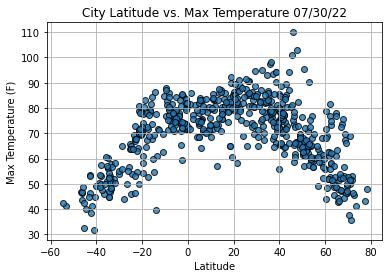

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

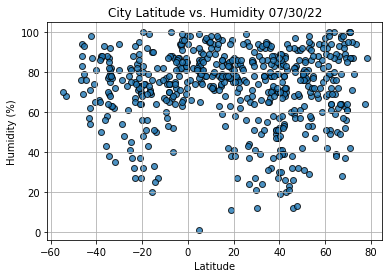

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title("City Latitude vs. Humidity "+ str(time.strftime("%x")))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

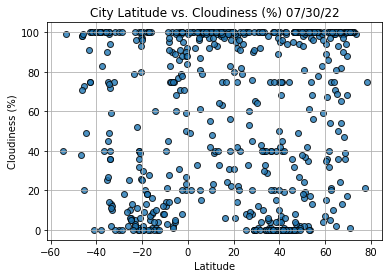

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

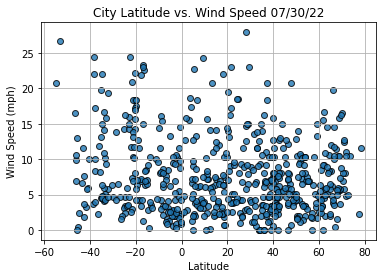

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()